## Introduction to Atmospheric Radar Course - Practical 1

<img src="NCAS_national_centre_logo_transparent.png" alt="NCAS" style="width: 200px;"/>

## An Introduction to reading and interogating radar files with open source radar packages
### Part 2 - Xradar

<img src="xradar_logo.svg" alt="Xradar" style="width: 200px;"/>

#### Overview
This notebook introduces Xradar originally developed by . We introduce the data model used by Xradar, how to read data files with Xradar and how to use the data model to interogate basic information found within those files. Example files from the NCAS mobile X-band radar and the ??? radar are used in this notebook.

##### An introduction to Xradar

- Official source code repository: https://github.com/openradar/xradar
- 
HTML documentation: https://docs.openradarscience.org/projects/xradar/en/stable/


In [1]:
import xradar
import xarray

##### The Xradar data model

In [2]:
example_file = '/gws/nopw/j04/ncas_radar_vol2/data/ncas-mobile-x-band-radar-1/raine/cfradial/calib_v1/sur/20191110/ncas-mobile-x-band-radar-1_sandwith_20191110-204252_SUR_v1.nc'

In [3]:
ds = xarray.open_dataset(example_file, group="sweep_0", engine="cfradial1")

/home/users/dufton/software/miniconda3/envs/RadarEnv/lib/python3.12/site-packages/xradar/io/backends/cfradial1.py:148: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(root.dims["sweep"]):


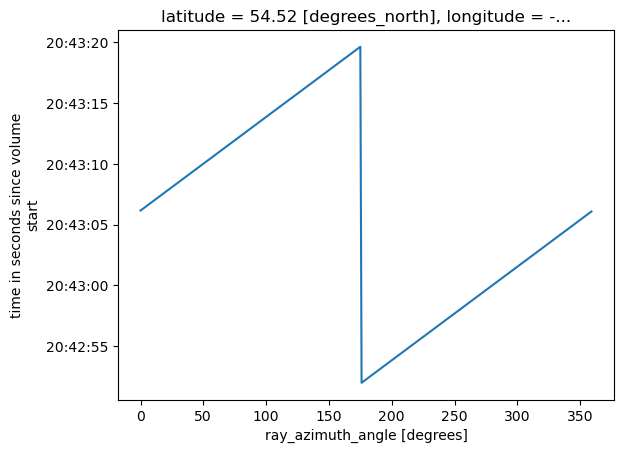

In [4]:
ds.azimuth.plot(y="time")

In [8]:
radar = xradar.io.open_cfradial1_datatree(example_file, first_dim="auto")
display(radar)

/home/users/dufton/software/miniconda3/envs/RadarEnv/lib/python3.12/site-packages/xradar/io/backends/cfradial1.py:148: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for i in range(root.dims["sweep"]):


DataTree('root', parent=None)
│   Dimensions:              (frequency: 1, sweep: 10)
│   Coordinates:
│     * frequency            (frequency) float32 9.401e+09
│   Dimensions without coordinates: sweep
│   Data variables: (12/13)
│       volume_number        float64 ...
│       platform_type        |S32 ...
│       primary_axis         |S32 ...
│       status_str           |S18750 ...
│       instrument_type      |S32 ...
│       time_coverage_start  |S32 ...
│       ...                   ...
│       latitude             float64 ...
│       longitude            float64 ...
│       altitude             float64 ...
│       altitude_agl         float64 ...
│       sweep_group_name     (sweep) <U9 'sweep_0.0' 'sweep_1.0' ... 'sweep_9.0'
│       sweep_fixed_angle    (sweep) float32 ...
│   Attributes: (12/14)
│       Conventions:         CF-1.7
│       version:             CF-Radial-1.4
│       title:               Moments from the NCAS Mobile X-band Radar at Sandwit...
│       institution:         National Centre for Atmospheric Science (NCAS)
│       references:          https://doi.org/10.5194/amt-11-6481-2018
│       source:              Leonardo Gematronik 50DX Mobile X-band Radar
│       ...                  ...
│       instrument_name:     ncas-mobile-x-band-radar-1
│       site_name:           sandwith
│       scan_name:           
│       scan_id:             0
│       platform_is_mobile:  false
│       ray_times_increase:  true
├── DataTree('radar_parameters')
│       Dimensions:                   ()
│       Data variables:
│           radar_beam_width_h        float32 ...
│           radar_receiver_bandwidth  float32 ...
│           radar_antenna_gain_h      float32 ...
│           radar_beam_width_v        float32 ...
│           radar_antenna_gain_v      float32 ...
├── DataTree('radar_calibration')
│       Dimensions:                   ()
│       Data variables: (12/55)
│           time                      |S32 ...
│           pulse_width               timedelta64[ns] ...
│           xmit_power_h              float32 ...
│           xmit_power_v              float32 ...
│           two_way_waveguide_loss_h  float32 ...
│           two_way_waveguide_loss_v  float32 ...
│           ...                        ...
│           zdr_correction            float32 ...
│           ldr_correction_h          float32 ...
│           ldr_correction_v          float32 ...
│           system_phidp              float32 ...
│           test_power_h              float32 ...
│           test_power_v              float32 ...
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:                    (azimuth: 360, range: 1000)
│       Coordinates:
│           time                       (azimuth) datetime64[ns] 2019-11-10T20:43:06.1...
│         * range                      (range) float32 75.0 225.0 ... 1.499e+05
│           elevation                  (azimuth) float32 ...
│         * azimuth                    (azimuth) float32 0.01099 1.011 ... 358.0 359.0
│           latitude                   float64 ...
│           longitude                  float64 ...
│           altitude                   float64 ...
│       Data variables: (12/52)
│           sweep_number               float64 ...
│           sweep_mode                 <U20 'azimuth_surveillance'
│           prt_mode                   |S32 ...
│           follow_mode                |S32 ...
│           sweep_fixed_angle          float32 ...
│           ray_start_range            (azimuth) float32 ...
│           ...                         ...
│           dBuZ                       (azimuth, range) float32 ...
│           dBuZv                      (azimuth, range) float32 ...
│           uKDP                       (azimuth, range) float32 ...
│           uKDPu                      (azimuth, range) float32 ...
│           uPhiDP                     (azimuth, range) float32 ...
│           uPhiDPu                    (azimuth, range) float32 ...
├── D

In [15]:
for key in radar['sweep_0'].variables.keys():
    print(key)

sweep_number
sweep_mode
prt_mode
follow_mode
sweep_fixed_angle
time
range
ray_start_range
ray_gate_spacing
elevation
pulse_width
prt
prt_ratio
nyquist_velocity
unambiguous_range
antenna_transition
n_samples
r_calib_index
measured_transmit_power_h
measured_transmit_power_v
scan_rate
CCOR
CCORv
DOP
DOPu
KDP
PhiDP
RhoHV
RhoHVu
SNR
SNRu
SNRv
SNRvu
SQI
SQIu
SQIv
SQIvu
V
Vu
Vv
Vvu
W
Wu
Wv
Wvu
ZDR
ZDRu
dBZ
dBZv
dBuZ
dBuZv
uKDP
uKDPu
uPhiDP
uPhiDPu
azimuth
latitude
longitude
altitude
